In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.1

In [2]:
df = pd.read_csv('week2.csv')
df = df.sort_values(by=['Date'])
df = df.drop(['Unnamed: 2', 'Month.1', 'Year.1'], axis = 1)
df.head()

,Year,Month,Date,Close_Price,Open_Price,High_Price,Low_Price,Total_Traded_Quantity,VWAP,Day_Perc_Change,Trend
502,2017,10,2017-10-25,972.91,978,984.44,966.24,3030000.0,1071.787264,0.049361,Slight or No change
501,2017,10,2017-10-26,972.43,980.33,982.9,968.55,5620000.0,1081.068494,-11.673555,Bear drop
500,2017,10,2017-10-27,1100.95,"1,058.14","1,105.58","1,050.55",16570000.0,1103.969782,-0.891209,Slight negative
499,2017,10,2017-10-30,1110.85,"1,095.01","1,122.79","1,093.56",6610000.0,1108.928930,0.503945,Slight positive
498,2017,10,2017-10-31,1105.28,"1,109.00","1,110.54","1,101.12",3480000.0,1105.280000,0.144970,Slight or No change


In [3]:
df.dtypes

Year                       int64
Month                      int64
Date                      object
Close_Price              float64
Open_Price                object
High_Price                object
Low_Price                 object
Total_Traded_Quantity    float64
VWAP                     float64
Day_Perc_Change          float64
Trend                     object
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Year                              int64
Month                             int64
Date                     datetime64[ns]
Close_Price                     float64
Open_Price                       object
High_Price                       object
Low_Price                        object
Total_Traded_Quantity           float64
VWAP                            float64
Day_Perc_Change                 float64
Trend                            object
dtype: object

In [5]:
df.set_index("Date", inplace = True)
df.head()

,Year,Month,Close_Price,Open_Price,High_Price,Low_Price,Total_Traded_Quantity,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,
2017-10-25,2017,10,972.91,978,984.44,966.24,3030000.0,1071.787264,0.049361,Slight or No change
2017-10-26,2017,10,972.43,980.33,982.9,968.55,5620000.0,1081.068494,-11.673555,Bear drop
2017-10-27,2017,10,1100.95,"1,058.14","1,105.58","1,050.55",16570000.0,1103.969782,-0.891209,Slight negative
2017-10-30,2017,10,1110.85,"1,095.01","1,122.79","1,093.56",6610000.0,1108.928930,0.503945,Slight positive
2017-10-31,2017,10,1105.28,"1,109.00","1,110.54","1,101.12",3480000.0,1105.280000,0.144970,Slight or No change


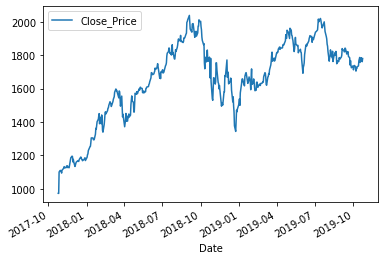

In [6]:
df.reset_index().plot(x='Date', y='Close_Price');

## 2.2

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


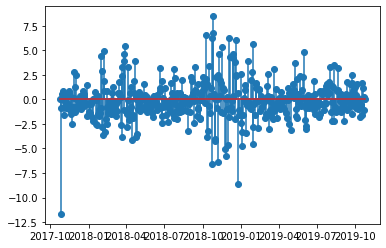

In [7]:
plt.stem(df.index.values,df.Day_Perc_Change, bottom=0);

## 2.3

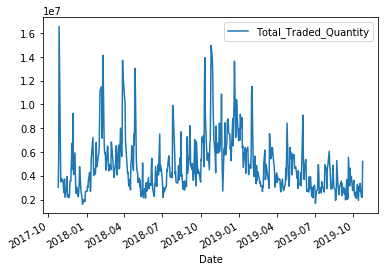

In [8]:
df.reset_index().plot(x='Date', y='Total_Traded_Quantity');

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


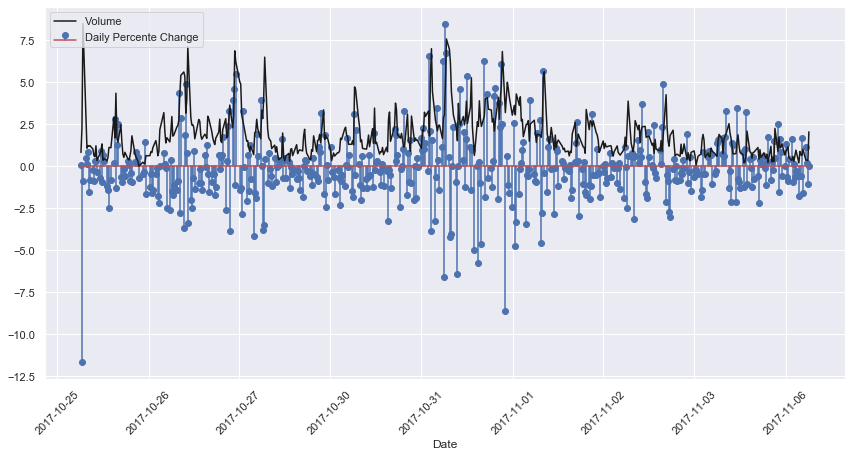

In [9]:
sns.set(style="darkgrid")

scaledvolume =  df["Total_Traded_Quantity"] - df["Total_Traded_Quantity"].min()
scaledvolume = scaledvolume/scaledvolume.max() * df.Day_Perc_Change.max()

fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(df.index, df.Day_Perc_Change , 'b', markerfmt='bo', label='Daily Percente Change')
ax.plot(df.index, scaledvolume, 'k', label='Volume')

ax.set_xlabel('Date')
plt.legend(loc=2)

plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.show()

## 2.4

In [10]:
df = df.reset_index()
df.head()

,Date,Year,Month,Close_Price,Open_Price,High_Price,Low_Price,Total_Traded_Quantity,VWAP,Day_Perc_Change,Trend
0,2017-10-25,2017,10,972.91,978,984.44,966.24,3030000.0,1071.787264,0.049361,Slight or No change
1,2017-10-26,2017,10,972.43,980.33,982.9,968.55,5620000.0,1081.068494,-11.673555,Bear drop
2,2017-10-27,2017,10,1100.95,"1,058.14","1,105.58","1,050.55",16570000.0,1103.969782,-0.891209,Slight negative
3,2017-10-30,2017,10,1110.85,"1,095.01","1,122.79","1,093.56",6610000.0,1108.928930,0.503945,Slight positive
4,2017-10-31,2017,10,1105.28,"1,109.00","1,110.54","1,101.12",3480000.0,1105.280000,0.144970,Slight or No change


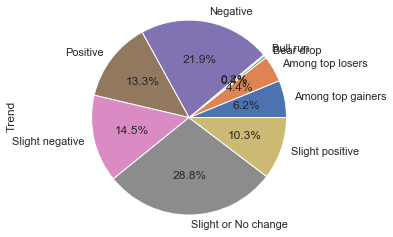

In [11]:
df.Trend.groupby(df.Trend).count().plot(kind='pie', autopct='%.1f%%')
plt.axis('equal')
plt.show()

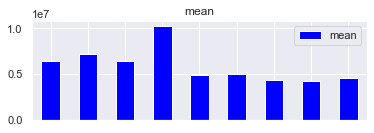

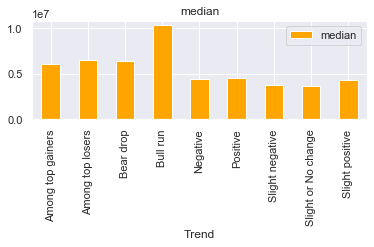

In [12]:
avg = df.groupby(df['Trend'])['Total_Traded_Quantity'].mean()
med = df.groupby(df['Trend'])['Total_Traded_Quantity'].median()
plt.subplot(2, 1, 1)
avg.plot.bar(color='Blue', label='mean').label_outer()
plt.title('mean')
plt.legend()
plt.show()
plt.subplot(2, 1, 2)
med.plot.bar(color='Orange', label='median')
plt.title('median')
plt.legend()
plt.show()

## 2.5

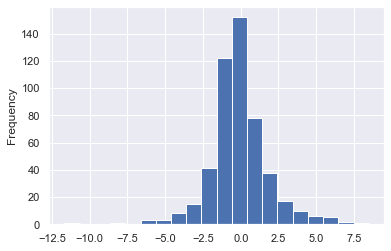

In [13]:
df['Day_Perc_Change'].plot.hist(bins=20);

## 2.6

In [14]:
jublfood = pd.read_csv('JUBLFOOD.csv')
jublfood = jublfood.drop(jublfood[jublfood.Series != 'EQ'].index)
jublfood.reset_index(inplace=True)
print(jublfood.shape)
jublfood.head()

(494, 16)


,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,JUBLFOOD,EQ,15-May-2017,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,576466,5.820685e+08,19888,115368,20.01
1,1,JUBLFOOD,EQ,16-May-2017,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,487510,5.081107e+08,15487,84859,17.41
2,2,JUBLFOOD,EQ,17-May-2017,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,393751,4.094726e+08,15205,61936,15.73
3,3,JUBLFOOD,EQ,18-May-2017,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,381432,3.943245e+08,10345,40599,10.64
4,4,JUBLFOOD,EQ,19-May-2017,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,287852,2.951171e+08,9834,60049,20.86


In [15]:
godrejind = pd.read_csv('GODREJIND.csv')
godrejind = godrejind.drop(godrejind[godrejind.Series != 'EQ'].index)
godrejind.reset_index(inplace=True)
print(godrejind.shape)
godrejind.head()

(494, 16)


,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,GODREJIND,EQ,15-May-2017,564.60,581.00,584.00,568.50,578.90,578.55,578.09,797171,4.608362e+08,21649,360927,45.28
1,1,GODREJIND,EQ,16-May-2017,578.55,581.45,589.00,572.25,583.80,584.80,583.60,500223,2.919302e+08,17204,210364,42.05
2,2,GODREJIND,EQ,17-May-2017,584.80,583.00,594.00,576.85,584.90,588.60,588.74,504155,2.968149e+08,8567,261667,51.90
3,3,GODREJIND,EQ,18-May-2017,588.60,582.00,588.85,571.20,572.25,574.60,580.90,223583,1.298786e+08,7144,99785,44.63
4,4,GODREJIND,EQ,19-May-2017,574.60,581.00,585.80,567.55,579.85,578.00,577.31,245436,1.416925e+08,4969,68041,27.72


In [16]:
maruti = pd.read_csv('MARUTI.csv')
maruti = maruti.drop(maruti[maruti.Series != 'EQ'].index)
maruti.reset_index(inplace=True)
print(maruti.shape)
maruti.head()

(494, 16)


,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


In [17]:
pvr = pd.read_csv('PVR.csv')
pvr = pvr.drop(pvr[pvr.Series != 'EQ'].index)
pvr.reset_index(inplace=True)
print(pvr.shape)
pvr.head()

(494, 16)


,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67


In [18]:
tcs = pd.read_csv('TCS.csv')
tcs = tcs.drop(tcs[tcs.Series != 'EQ'].index)
tcs.reset_index(inplace=True)
print(tcs.shape)
tcs.head()

(494, 16)


,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [19]:
combined = pd.concat([godrejind['Close Price'], jublfood['Close Price'], maruti['Close Price'], pvr['Close Price'], tcs['Close Price']], join='inner', axis=1, keys=['GODREJIND', 'JUBLFOOD', 'MARUTI', 'PVR', 'TCS'])
combined.head()

,GODREJIND,JUBLFOOD,MARUTI,PVR,TCS
0,578.55,1025.45,6823.90,1524.95,2365.10
1,584.80,1050.65,6953.95,1539.00,2429.15
2,588.60,1049.05,6958.20,1530.30,2455.35
3,574.60,1019.35,6831.05,1515.05,2536.20
4,578.00,1018.10,6790.55,1513.55,2507.15


In [20]:
perc_change = pd.DataFrame()
perc_change['GODREJIND'] = combined['GODREJIND'].pct_change()*100
perc_change['GODREJIND'][0] = 0
perc_change['JUBLFOOD'] = combined['JUBLFOOD'].pct_change()*100
perc_change['JUBLFOOD'][0] = 0
perc_change['MARUTI'] = combined['MARUTI'].pct_change()*100
perc_change['MARUTI'][0] = 0
perc_change['PVR'] = combined['PVR'].pct_change()*100
perc_change['PVR'][0] = 0
perc_change['TCS'] = combined['TCS'].pct_change()*100
perc_change['TCS'][0] = 0
perc_change.head()

,GODREJIND,JUBLFOOD,MARUTI,PVR,TCS
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.080287,2.457458,1.905802,0.921342,2.708131
2,0.649795,-0.152287,0.061116,-0.565302,1.078567
3,-2.378525,-2.831133,-1.827340,-0.996537,3.292810
4,0.591716,-0.122627,-0.592881,-0.099007,-1.145414


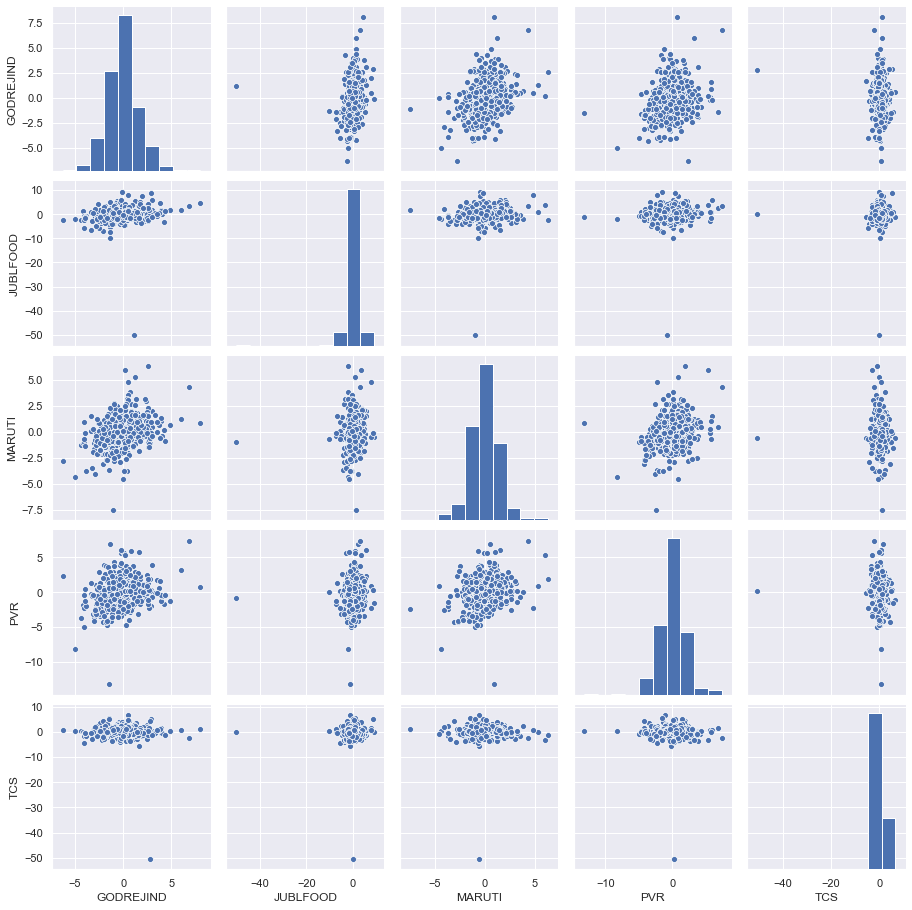

In [21]:
sns.pairplot(perc_change);

## 2.7

In [22]:
perc_change = perc_change.drop([0])
perc_change.reset_index(inplace=True)
perc_change.head()

,index,GODREJIND,JUBLFOOD,MARUTI,PVR,TCS
0,1,1.080287,2.457458,1.905802,0.921342,2.708131
1,2,0.649795,-0.152287,0.061116,-0.565302,1.078567
2,3,-2.378525,-2.831133,-1.827340,-0.996537,3.292810
3,4,0.591716,-0.122627,-0.592881,-0.099007,-1.145414
4,5,-2.084775,1.198311,-1.308436,-2.150573,0.965239


   GODREJIND  JUBLFOOD    MARUTI       PVR       TCS
0   0.000000  0.000000  0.000000  0.000000  0.000000
1   0.215246  1.304872  0.922343  0.743322  0.814782
2   1.539099  2.159120  1.524084  0.821539  0.936910
3   1.378038  1.869992  1.348622  0.713198  1.721081
4   1.484981  1.758872  1.297517  1.012500  1.553279


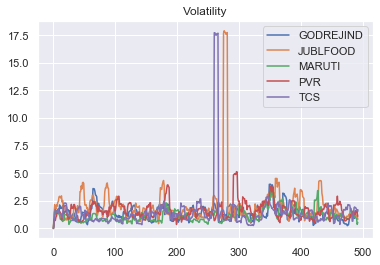

In [23]:
print(perc_change[['GODREJIND', 'JUBLFOOD', 'MARUTI', 'PVR', 'TCS']].rolling(7, min_periods=1).std(ddof=0).head())
plt.plot(perc_change[['GODREJIND', 'JUBLFOOD', 'MARUTI', 'PVR', 'TCS']].rolling(7, min_periods=1).std(ddof=0))
plt.legend(["GODREJIND", "JUBLFOOD", "MARUTI", "PVR", "TCS"])
plt.title('Volatility');

## 2.8

In [24]:
nifty = pd.read_csv('Nifty50.csv')
nifty['PCT'] = nifty['Close'].pct_change()*100
nifty = nifty.drop([0])
nifty.reset_index(inplace=True)
nifty.head()

,index,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),PCT
0,1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
1,2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
2,3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
3,4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438
4,5,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.109781


        PCT
0  0.000000
1  0.282915
2  0.715167
3  0.619564
4  0.557577


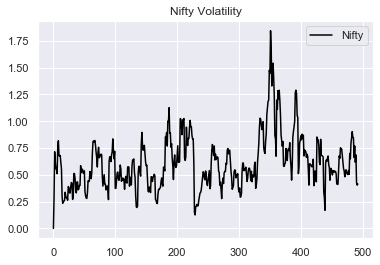

In [25]:
print(nifty[['PCT']].rolling(7, min_periods=1).std(ddof=0).head())
plt.plot(nifty[['PCT']].rolling(7, min_periods=1).std(ddof=0), color='Black');
plt.legend(["Nifty"]);
plt.title('Nifty Volatility');

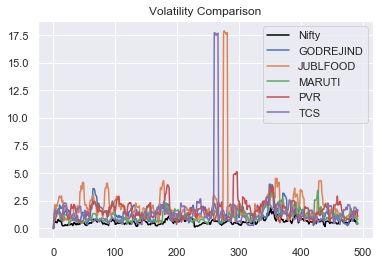

In [26]:
plt.plot(nifty[['PCT']].rolling(7, min_periods=1).std(ddof=0), color='Black');
plt.plot(perc_change[['GODREJIND', 'JUBLFOOD', 'MARUTI', 'PVR', 'TCS']].rolling(7, min_periods=1).std(ddof=0));
plt.legend(["Nifty", "GODREJIND", "JUBLFOOD", "MARUTI", "PVR", "TCS"]);
plt.title('Volatility Comparison');

## 2.9

In [27]:
short_window = 21
long_window = 34
tcs_roll_21 = combined['TCS'].rolling(short_window, min_periods=1).mean()
tcs_roll_34 = combined['TCS'].rolling(long_window, min_periods=1).mean()
date = pd.to_datetime(tcs['Date'])
signals = pd.DataFrame(index=date)
signals['signal'] = 0
signals['signal'][short_window:] = np.where(tcs_roll_21[short_window:] > tcs_roll_34[short_window:], 1, 0)
signals['position'] = signals['signal'].diff().fillna(0)
signals['short_mavg'] = tcs_roll_21.tolist()
signals['long_mavg'] = tcs_roll_34.tolist()
signals.head()

,signal,position,short_mavg,long_mavg
Date,,,,
2017-05-15,0,0.0,2365.100000,2365.100000
2017-05-16,0,0.0,2397.125000,2397.125000
2017-05-17,0,0.0,2416.533333,2416.533333
2017-05-18,0,0.0,2446.450000,2446.450000
2017-05-19,0,0.0,2458.590000,2458.590000


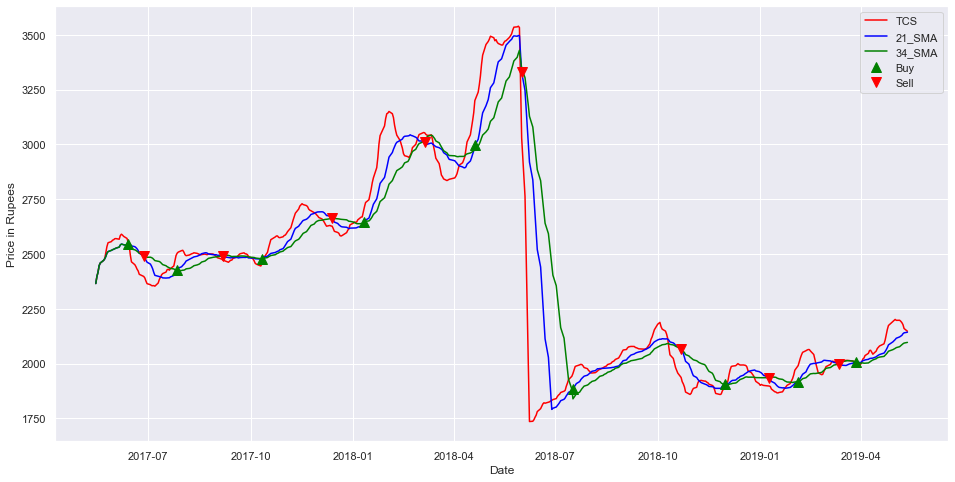

In [28]:
plt.figure(figsize=(16,8))
plt.plot(date, combined['TCS'].rolling(7, min_periods=1).mean(), color='red', label='TCS')
plt.plot(date, tcs_roll_21, color='blue', label='21_SMA')
plt.plot(date, tcs_roll_34, color='green', label='34_SMA')
plt.plot(signals.loc[signals.position == 1].index, signals['short_mavg'][signals.position == 1], '^', markersize=10, color='green', label='Buy')
plt.plot(signals.loc[signals.position == -1].index, signals['short_mavg'][signals.position == -1], 'v', markersize=10, color='red', label='Sell')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price in Rupees')
plt.show()

## 2.10

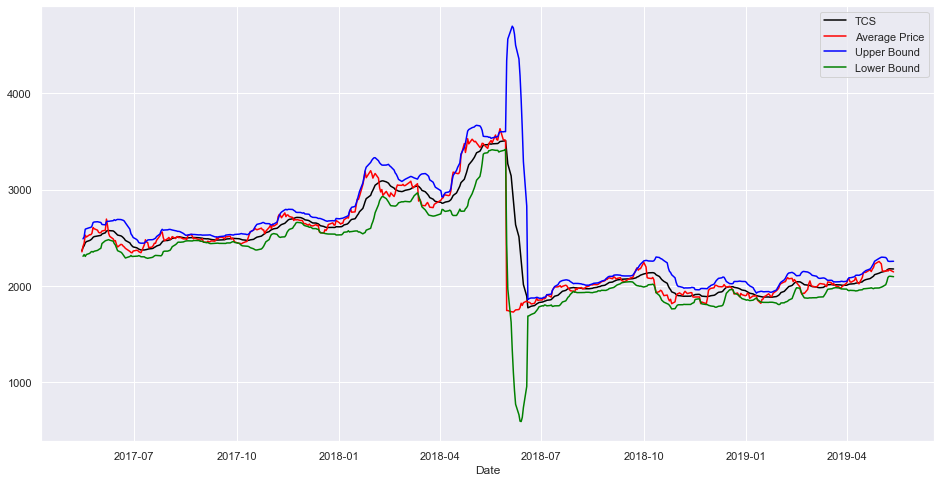

In [29]:
tcs_mean_14 = combined.TCS.rolling(14, min_periods=1).mean()
tcs_std_14 = combined.TCS.rolling(14, min_periods=1).std()
upper = tcs_mean_14 + 2*tcs_std_14
lower = tcs_mean_14 - 2*tcs_std_14
plt.figure(figsize=(16,8))
plt.plot(date, tcs_mean_14, color='black', label='TCS')
plt.plot(date, tcs['Average Price'], color='red', label='Average Price')
plt.plot(date, upper, color='blue', label='Upper Bound')
plt.plot(date, lower, color='green', label='Lower Bound')
plt.xlabel('Date')
plt.legend()
plt.show()